In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mesostat.metric.npeet import average_entropy_3D
from mesostat.utils.arrays import numpy_add_empty_axes
from npeet.entropy_estimators import entropy, mi

entropy1D = lambda x: average_entropy_3D(numpy_add_empty_axes(x, [1, 2]), {})
avgEntropy2D = lambda x: average_entropy_3D(numpy_add_empty_axes(x, [2]), {})

# 1D Entropy as function of signal magnitude

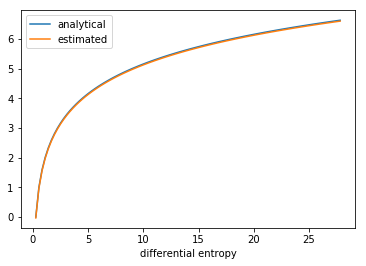

In [2]:
data = np.random.uniform(0, 1, 1000)
alphaLst = np.arange(1, 100)

stdLst = [np.std(a * data) for a in alphaLst]
hLst = [entropy1D(a * data) for a in alphaLst]

plt.figure()
plt.plot(stdLst, np.log2(alphaLst), label='analytical')
plt.plot(stdLst, hLst, label='estimated')
plt.legend()
plt.xlabel('standard deviation')
plt.xlabel('differential entropy')
plt.show()

# Multivariate entropy as function of single channel magnitude

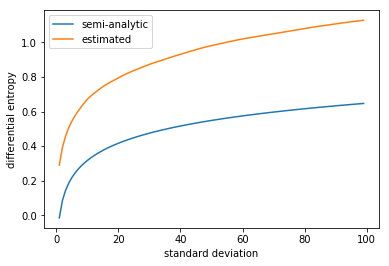

In [3]:
def scale_one(x, alpha):
    xNew = np.copy(x)
    xNew[0] *= alpha
    return xNew

nDim = 10
data = np.random.uniform(0, 1, (nDim, 1000))
alphaLst = np.arange(1, 100)

avgh1D = []
avghND = []
for a in alphaLst:
    dataScaled = scale_one(data, a)
    avgh1D += [np.mean([entropy1D(d) for d in dataScaled])]
    avghND += [avgEntropy2D(dataScaled.T)]
    
avgh1D = np.array(avgh1D)
avghND = np.array(avghND)

plt.figure()
plt.plot(alphaLst, avgh1D, label='semi-analytic')
plt.plot(alphaLst, avghND, label='estimated')
plt.legend()
plt.xlabel('standard deviation')
plt.ylabel('differential entropy')
plt.savefig('hnd_vs_std.svg')
plt.show()

# Mutual Information as function of single channel magnitude

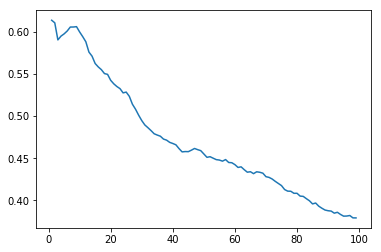

In [4]:
x = np.random.uniform(0,1,(1000,1))
y = np.random.uniform(0,1,(1000,1))
z = 0.5*x + 0.5*y
alphaLst = np.arange(1, 100)

miLst = [mi(a*x, z) for a in alphaLst]

plt.figure()
plt.plot(alphaLst, miLst)
plt.savefig('mi_vs_std.svg')
plt.show()